In [29]:
import matplotlib.pyplot as plt 
import torch 
import glob 

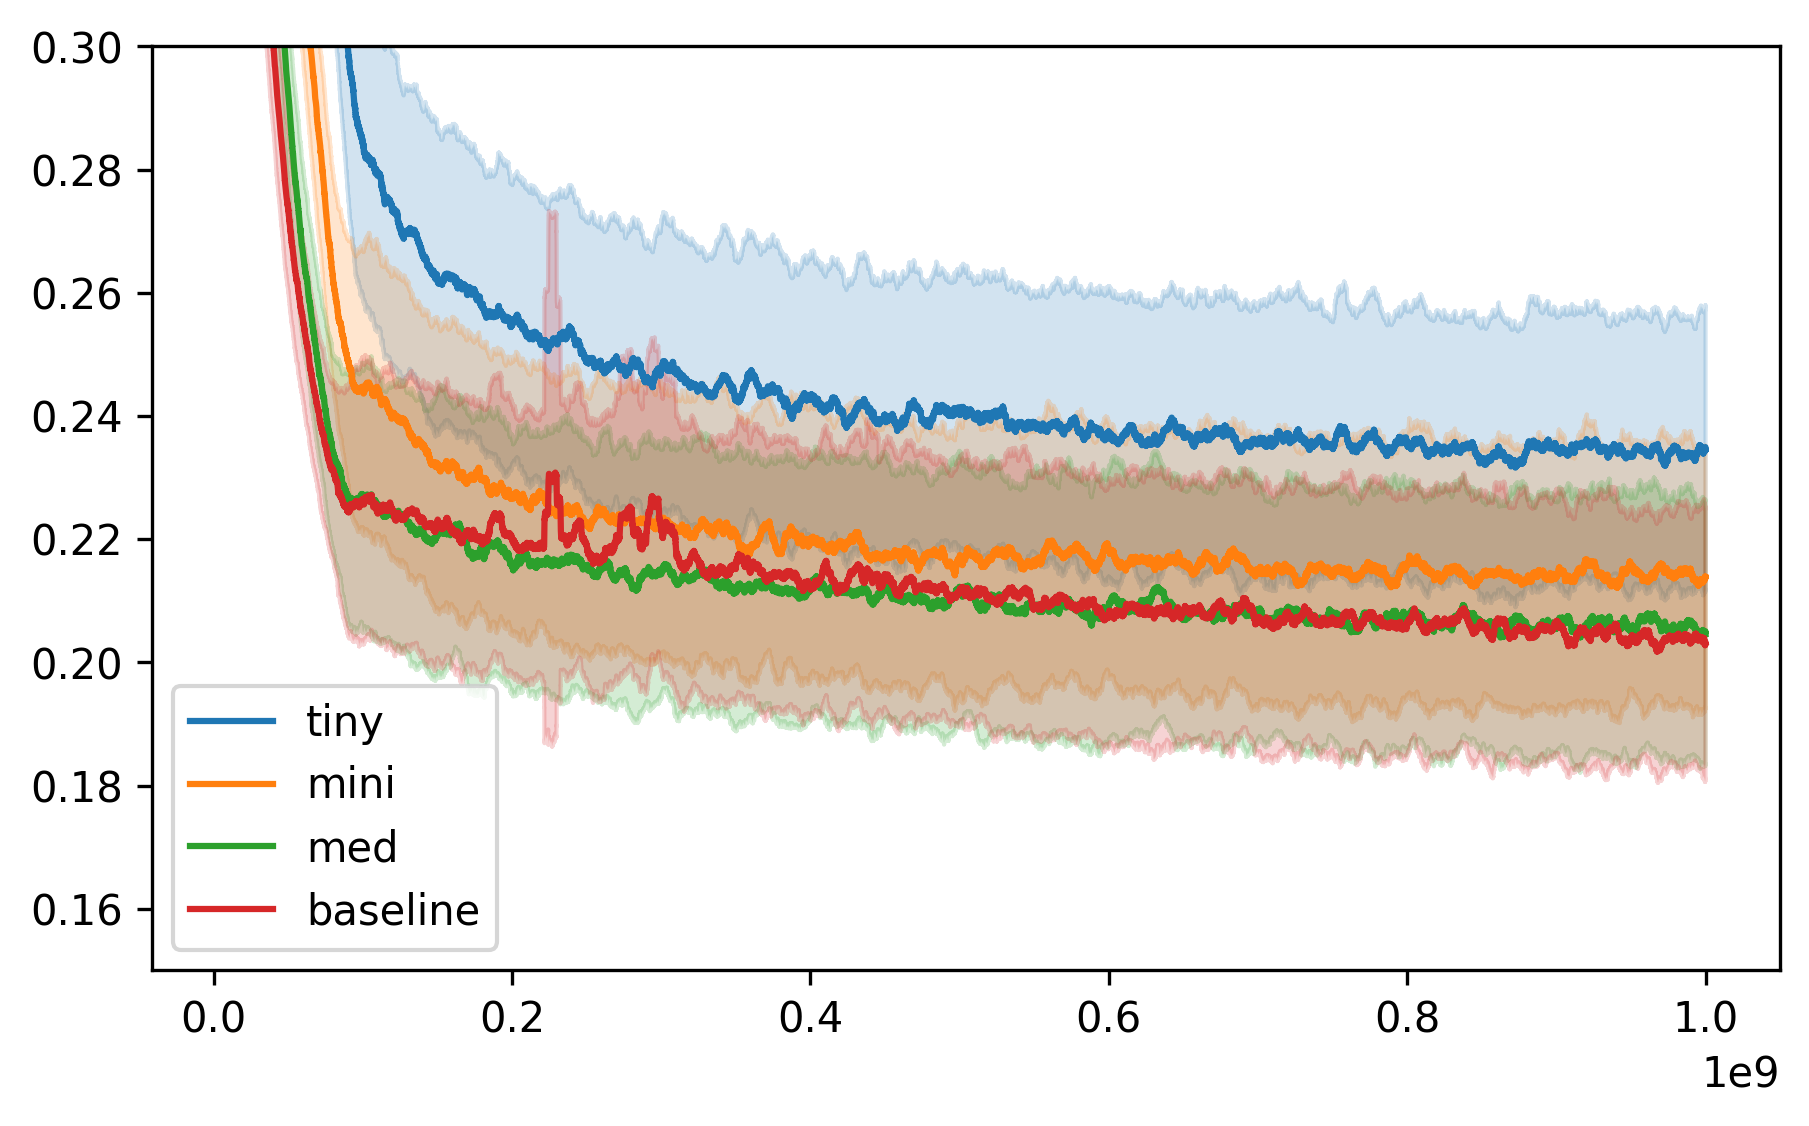

In [ ]:
logs = glob.glob('../pretrained/rw_sampling/lanl14argus_e9_64/*_log_*.txt')
losses = dict() 

for l in logs: 
    loss = []
    tokens = []
    with open(l, 'r') as f: 
        line = f.readline() 
        while line: 
            ls = line.split(',')
            loss.append(float(ls[0]))
            tokens.append(float(ls[2]))
            line = f.readline() 

    losses[l.split('_')[-1].replace('.txt', '')] = (torch.tensor(loss),torch.tensor(tokens))

plt.figure(figsize=(7, 4), dpi=300)
SMOOTHING_FACTOR = 500
for i,k in enumerate(['tiny', 'mini', 'med', 'baseline']): 
    loss,tokens = losses[k]
    segments = loss.unfold(0, size=SMOOTHING_FACTOR, step=1)

    mid = segments.mean(dim=-1)
    std = segments.std(dim=-1)
    
    # Hide some weird artifacts from wonkiness at the start
    std = std.clamp(0,1)

    epochs = tokens[SMOOTHING_FACTOR-1:]
    plt.plot(epochs, mid, label=k, color=f'C{i}')
    plt.fill_between(x=epochs, y1=mid+std, y2=mid-std, color=f'C{i}', alpha=0.2)

plt.ylim(0.15, 0.3)
plt.legend()
plt.tight_layout()
plt.show()